# Individual Contribution
#### by Theo Marill

The data of interest for this project is a player and session information of gamers using a free Minecraft server hosted and monitored by the Pacific Laboratory for Artificial Intelligence at UBC studying player behaviours to develop embodied AI. We have two `.csv` files called `players` and `sessions` with 196 and 1535 observations, respectively. 

   - The 7 player observations include:
        1. `experience` - The player's minecraft experience (Beginner, Amateur, Regular, Pro, or Veteran)
        2. `subscribe` - TRUE if they subscribe to the newsletter or FALSE otherwise
        3. `hashedEmail` - Their hashed email
        4. `played_hours` How many hours they have played on the server (hours). Data ranges from 0 to 223 hours
        5. `name` - Their in-game name
        2. `gender` - Their gender
        6. `Age` - Their age (years). Data ranges from 9 to 58 years old
   - The 5 session oberservations include:
        1. `hashedEmail` - The player's hashed email
        2. `start_time` - The start time (human readable date and time). First session was on May 1st of 2024
        3. `end_time` - The end time (human readable date and time). Last session was on August 31st of 20
        2. `original_start_time` - The start time (Unix timestamp)
        4. `original_end_time` - The end time (Unix timestamp)

Issues:
Missing data values in `Age`, `end_time` and `original_end_time`.  
Unix Timestamps are less accurate than the human readable times.   
Reliability: all users are reporting their experience level, gender, age, etc. anonymously.  

### Question: 

Is the experience level of players predictive of playing sessions longer sessions?

This may find out if recruiting should be targeted to experience levels or can be wide. To answer this, I will need to calculate lengths of sessions.

First let's load our packages and data:

In [1]:
# run this cell
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# run this cell
raw_players <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/players.csv", show_col_types = FALSE)
raw_sessions <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/sessions.csv", show_col_types = FALSE)
raw_players
raw_sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Tidying

Let's standardize the column naming as well as separate the start/end *date* and the *time* of `start_time`/`end_time`.

In [3]:
# run this cell
players <- raw_players |>
    rename(hashed_email = hashedEmail, age = Age)|>
    mutate(experience = as_factor(experience), gender = as_factor(gender), hashed_email = fct_reorder(hashed_email, played_hours, .fun = sum))
sessions <- raw_sessions |>
    rename(hashed_email = hashedEmail) |>
    separate(col = start_time, into = c('start_date', 'start_time'), sep = " ")|>
    separate(col = start_time, into = c('start_hr', 'start_m'), sep = ":") |>
    mutate(start_time = as.double(start_hr) * 60 + as.double(start_m)) |>
    separate(col = end_time, into = c('end_date', 'end_time'), sep = " ")|>
    separate(col = end_time, into = c('end_hr', 'end_m'), sep = ":") |>
    mutate(end_time = as.double(end_hr) * 60 + as.double(end_m)) |>
    select(-start_hr, -start_m, -end_hr, -end_m)
players
sessions

experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<fct>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashed_email,start_date,end_date,original_start_time,original_end_time,start_time,end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,30/06/2024,1.71977e+12,1.71977e+12,1092,1104
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,17/06/2024,1.71867e+12,1.71867e+12,1413,1426
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,25/07/2024,1.72193e+12,1.72193e+12,1054,1077
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,28/07/2024,1.72218e+12,1.72218e+12,936,957
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,25/07/2024,1.72189e+12,1.72189e+12,375,382
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,20/05/2024,1.71617e+12,1.71617e+12,146,165


#### Means

In [4]:
# run this cell
mean_all <- players |>  
    select(subscribe, played_hours) |>
    map_dfr(mean) |>
    bind_cols(map_dfr(select(sessions, start_time, end_time, original_start_time, original_end_time), mean, na.rm = TRUE))


|subscribed?|hours played|start time| end time| unix start time| unix end time|
|---|---|---|---|---|---|
|0.7346939	|5.845918	|641.1987	|605.6354	|1.719201e+12	|1.719196e+12


#### Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


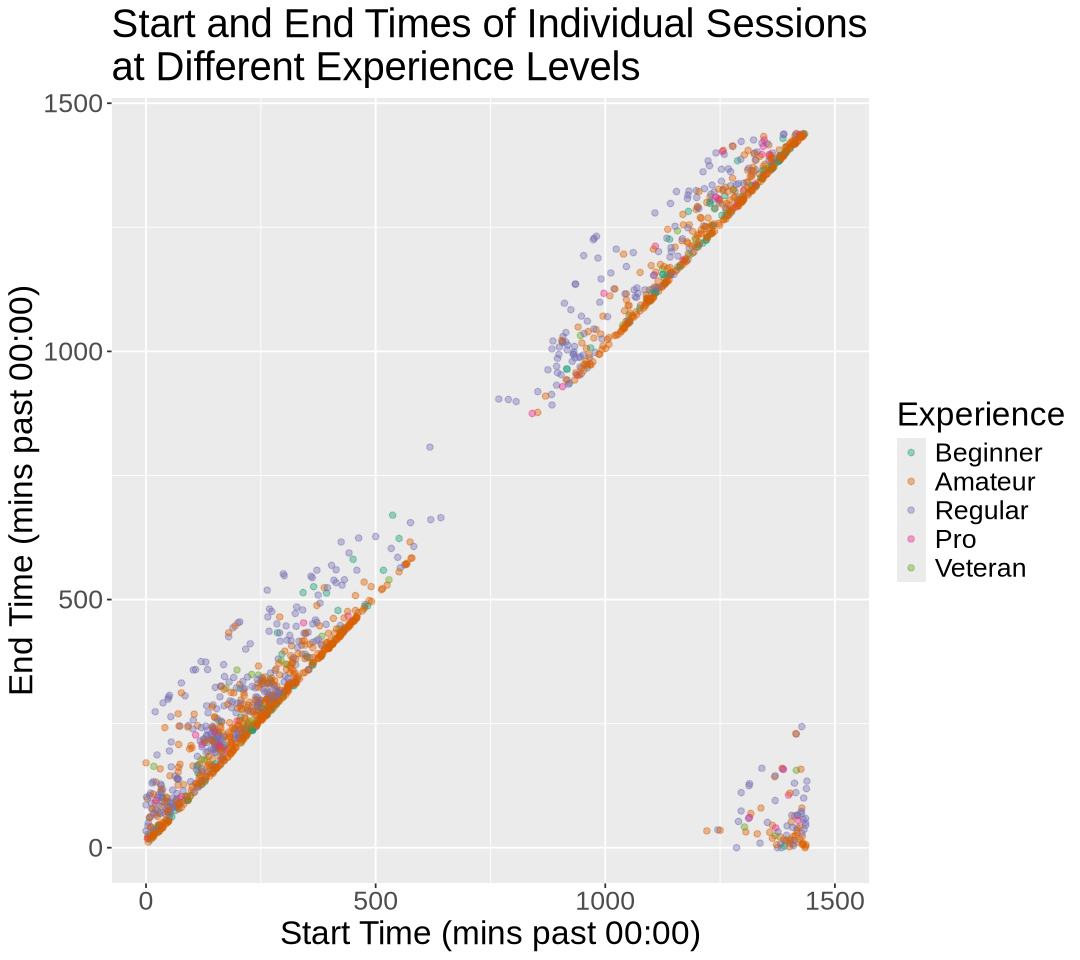

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


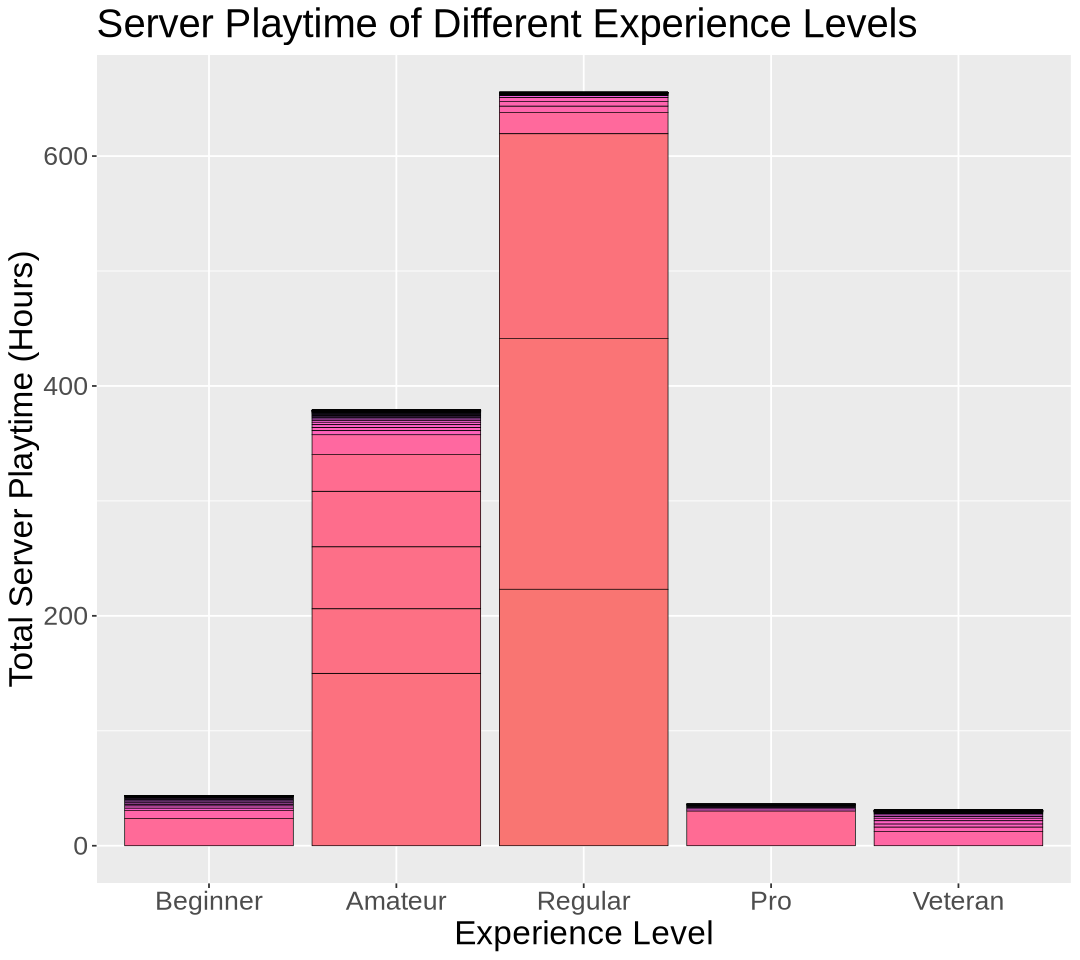

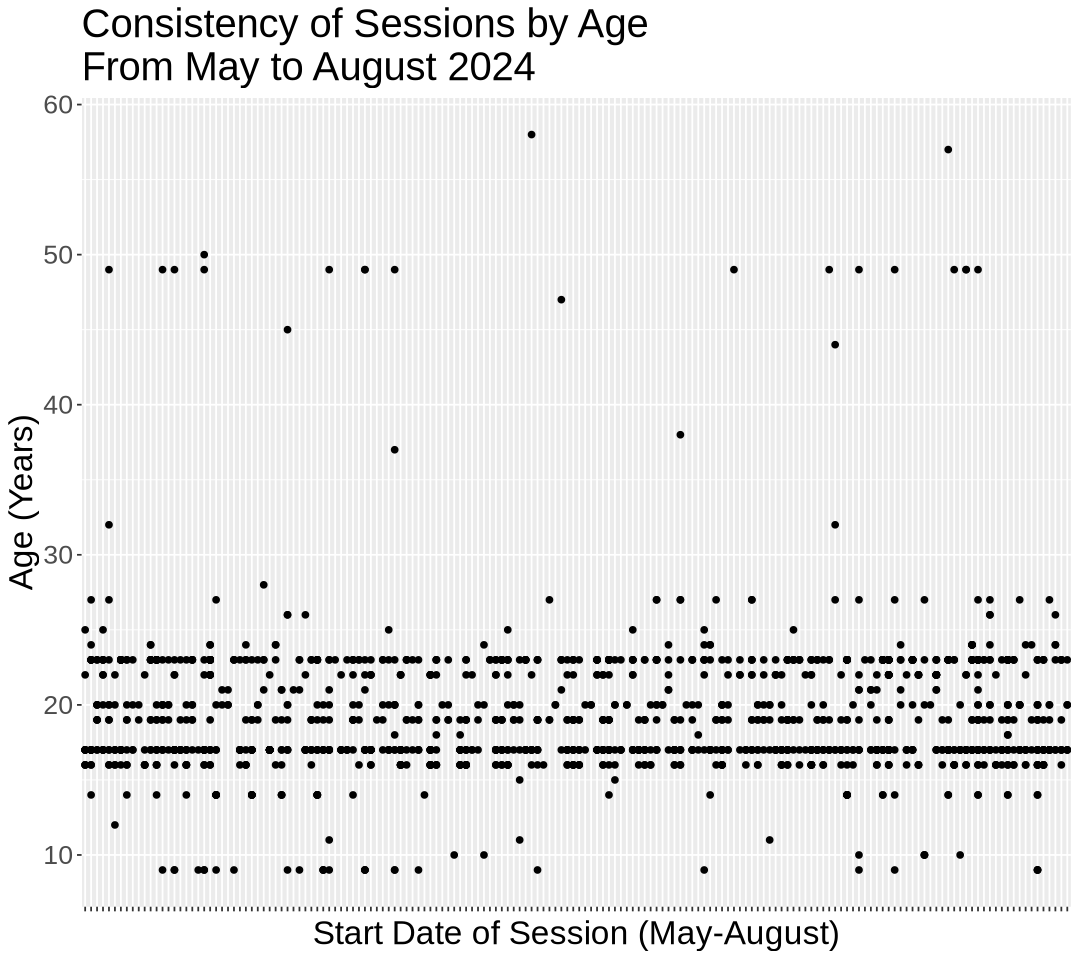

In [5]:
# run this cell
options(repr.plot.width = 9, repr.plot.height = 8)

named_sessions <- sessions |>
    merge(players)

start_vs_end <- ggplot(named_sessions, aes(x=start_time, y=end_time, colour = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran")))) +
    geom_point(alpha = 0.4) +
    labs(title="Start and End Times of Individual Sessions \nat Different Experience Levels",
         x="Start Time (mins past 00:00)",
         y="End Time (mins past 00:00)",
         colour="Experience") +
    xlim(0,1500) +
    theme(text = element_text(size = 20)) +
    scale_color_brewer(palette = "Dark2")
                       
experience_hours <- ggplot(players, aes(x = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran")), 
                                        y = played_hours,
                                        fill = hashed_email)) +
    geom_bar(stat = "identity", colour = "black", linewidth = 0.2) +
    labs(title="Server Playtime of Different Experience Levels",
         x="Experience Level",
         y="Total Server Playtime (Hours)") +
    theme(legend.position = "none", text = element_text(size = 20)) 

experience_sessions <- ggplot(named_sessions, aes(x=start_date, y=age)) +
                            geom_point() +
                            labs(title="Consistency of Sessions by Age \nFrom May to August 2024",
                                 x="Start Date of Session (May-August)",
                                 y="Age (Years)") +
                            theme(text = element_text(size = 20), axis.text.x = element_text(size = 0))

start_vs_end
experience_hours
experience_sessions

#### Interpretation
**#1**
- Most sessions are very short, and by Amateurs. The longest sessions are often Regulars, and aren't longer than 250 minutes.
- There is a gap everyday where players don't play. This could be when the server restarts.

**#2**
- The majority of playtime is attributed to Amateurs and Regulars. Only a few individuals contribute the majority of that time.

**#3**
- It seems the most consistent age group is between 16 and 23

### Methods and Plan
Details:
- Model -> knn-classification
- Predictors -> start and end time (representative of session lengths throughout the day)
- Predicting -> experience level
- Split -> 60% training split done once variables have been tidied and wrangled
- Validation -> 5-fold cross validation to tune for k  

Weaknesses:
- Will have to assume the self-reported experience levels are accurate  
- Class imbalance between different experience levels might skew data towards what is more represented  

Justification  
- knn-classification will work even in the shape the data will take (similar to graph #1)
- Can tune the fitting of the model to help reduce the effects of the class imbalance
- Will aid in answering the question of if recruitment should target 'kinds' of players

### Github Repository

<https://github.com/Booch58/individual_contribution>